In [11]:
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
# 1 GPU
df_1gpu = pd.read_csv('../stats/1gpu/resnet34-gpus1-rank0.csv')
df_1gpu.head(5)

,Unnamed: 0,epoch_loss,epoch_acc,epoch_test_loss,epoch_time
0,0,1.556598,47.846667,1.433885,429.039658
1,1,1.159502,61.052222,1.071548,428.007994
2,2,0.969793,64.342222,1.003086,422.210239
3,3,0.832765,67.654444,0.925351,427.568505
4,4,0.733300,71.192222,0.813602,430.543778


In [13]:
# 2 GPUs
df_2gpus_rank0 = pd.read_csv('../stats/2gpus/resnet34-gpus2-rank0.csv')
df_2gpus_rank1 = pd.read_csv('../stats/2gpus/resnet34-gpus2-rank1.csv')

df_2gpus_rank0.head(5)


def maxAcrossDfs(col1, col2, name):
    assert col1.size == col2.size
    
    res = []
    for i in range(col1.size):
        res.append(max(col1[i], col2[i]))
        
    return pd.DataFrame({name: res})

def meanAcrossDfs(col1, col2):
    assert col1.size == col2.size
    
    return col1.to_frame().join(col2.to_frame(name='other')).mean(axis=1)
    

df_2gpus_combined = pd.DataFrame()
for col in df_2gpus_rank0.columns:
    if col == 'epoch_acc':
        df_2gpus_combined[col] = df_2gpus_rank0[col] + df_2gpus_rank1[col]
    elif col == 'epoch_time':
        df_2gpus_combined[col] = maxAcrossDfs(df_2gpus_rank0[col], df_2gpus_rank1[col], col)
    elif 'loss' in col:
        df_2gpus_combined[col] = meanAcrossDfs(df_2gpus_rank0[col], df_2gpus_rank1[col])
    else:
        df_2gpus_combined[col] = df_2gpus_rank0[col]
        
df_2gpus_combined.head(20)

,Unnamed: 0,epoch_loss,epoch_acc,epoch_test_loss,epoch_time
0,0,1.559873,48.416667,1.465667,225.066028
1,1,1.153778,61.770000,1.059195,243.272734
2,2,0.970675,61.908889,1.089011,239.212297
3,3,0.839809,60.283333,1.145680,219.192704
4,4,0.742554,69.431111,0.873348,234.529962
5,5,0.656545,70.458889,0.867478,224.565238
6,6,0.580510,72.965556,0.802585,241.245051
7,7,0.507204,72.510000,0.811640,241.505961
8,8,0.434352,73.166667,0.809791,246.510834
9,9,0.354701,73.468889,0.883649,242.055661


In [14]:
# 3 GPUs
df_3gpus_rank0 = pd.read_csv('../stats/3gpus/resnet34-gpus3-rank0.csv')
df_3gpus_rank1 = pd.read_csv('../stats/3gpus/resnet34-gpus3-rank1.csv')
df_3gpus_rank2 = pd.read_csv('../stats/3gpus/resnet34-gpus3-rank2.csv')


def maxAcrossDfs(col1, col2, name):
    assert col1.size == col2.size
    
    res = []
    for i in range(col1.size):
        res.append(max(col1[i], col2[i]))
        
    return pd.DataFrame({name: res})

def meanAcrossDfs(col1, col2, col3, name):
    assert col1.size == col2.size
    
    return col1.to_frame()\
               .join(col2.to_frame(name='other'))\
               .join(col3.to_frame(name='other2'))\
               .mean(axis=1)
    

df_3gpus_combined = pd.DataFrame()
for col in df_3gpus_rank0.columns:
    if col == 'epoch_acc':
        df_3gpus_combined[col] = df_3gpus_rank0[col] + df_3gpus_rank1[col] + df_3gpus_rank2[col]
    elif col == 'epoch_time':
        df_3gpus_combined[col] = maxAcrossDfs(df_3gpus_rank0[col], df_3gpus_rank1[col], col)
        df_3gpus_combined[col] = maxAcrossDfs(df_3gpus_combined[col], df_3gpus_rank2[col], col)
    elif 'loss' in col:
        df_3gpus_combined[col] = meanAcrossDfs(df_3gpus_rank0[col], df_3gpus_rank1[col], df_3gpus_rank2[col], col)
    else:
        df_3gpus_combined[col] = df_3gpus_rank0[col]
        
df_3gpus_combined.head(20)

,Unnamed: 0,epoch_loss,epoch_acc,epoch_test_loss,epoch_time
0,0,1.632401,43.947778,1.497021,153.364892
1,1,1.232704,54.216667,1.244469,143.834756
2,2,1.019789,54.405556,1.349729,147.321747
3,3,0.875617,61.128889,1.097710,161.780576
4,4,0.774505,70.712222,0.830025,153.636320
5,5,0.681617,69.068889,0.927861,147.554694
6,6,0.607571,71.136667,0.839663,161.138496
7,7,0.533755,71.128889,0.887129,161.206829
8,8,0.459832,72.061111,0.847073,165.115272
9,9,0.380154,73.590000,0.859045,155.924777


In [15]:
# 4 GPUs
df_4gpus_rank0 = pd.read_csv('../stats/4gpus/resnet34-gpus4-rank0.csv')
df_4gpus_rank1 = pd.read_csv('../stats/4gpus/resnet34-gpus4-rank1.csv')
df_4gpus_rank2 = pd.read_csv('../stats/4gpus/resnet34-gpus4-rank2.csv')
df_4gpus_rank3 = pd.read_csv('../stats/4gpus/resnet34-gpus4-rank3.csv')


def maxAcrossDfs(col1, col2, name):
    assert col1.size == col2.size
    
    res = []
    for i in range(col1.size):
        res.append(max(col1[i], col2[i]))
        
    return pd.DataFrame({name: res})

def meanAcrossDfs(col1, col2, col3, col4, name):
    assert col1.size == col2.size
    
    return col1.to_frame()\
               .join(col2.to_frame(name='other'))\
               .join(col3.to_frame(name='other2'))\
               .join(col4.to_frame(name='other3'))\
               .mean(axis=1)
    

df_4gpus_combined = pd.DataFrame()
for col in df_4gpus_rank0.columns:
    if col == 'epoch_acc':
        df_4gpus_combined[col] = df_4gpus_rank0[col] + df_4gpus_rank1[col] + df_4gpus_rank2[col] + df_4gpus_rank3[col]
    elif col == 'epoch_time':
        df_4gpus_combined[col] = maxAcrossDfs(df_4gpus_rank0[col], df_4gpus_rank1[col], col)
        df_4gpus_combined[col] = maxAcrossDfs(df_4gpus_combined[col], df_4gpus_rank2[col], col)
        df_4gpus_combined[col] = maxAcrossDfs(df_4gpus_combined[col], df_4gpus_rank3[col], col)
    elif 'loss' in col:
        df_4gpus_combined[col] = meanAcrossDfs(df_4gpus_rank0[col],
                                               df_4gpus_rank1[col],
                                               df_4gpus_rank2[col],
                                               df_4gpus_rank3[col],
                                               col)
    else:
        df_4gpus_combined[col] = df_4gpus_rank0[col]
        
df_4gpus_combined.head(20)

,Unnamed: 0,epoch_loss,epoch_acc,epoch_test_loss,epoch_time
0,0,1.629657,41.587778,1.596659,108.195771
1,1,1.230235,55.118889,1.248092,108.874739
2,2,1.027656,61.508889,1.063913,108.477200
3,3,0.876243,61.633333,1.098764,111.051647
4,4,0.773420,66.283333,0.955539,109.284625
5,5,0.687307,67.841111,0.925789,111.783679
6,6,0.608784,69.447778,0.906833,119.053497
7,7,0.538849,69.657778,0.903004,109.296826
8,8,0.470367,73.884444,0.805236,109.771727
9,9,0.391243,69.860000,0.985766,118.352365


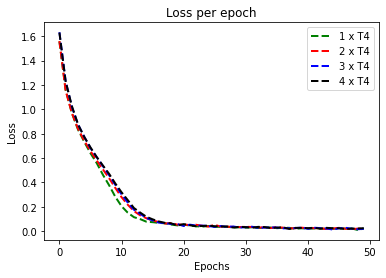

In [22]:
epochs = [x for x in range(50)]

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss per epoch')

plt.plot(epochs, df_1gpu['epoch_loss'], 'g--', label="1 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_2gpus_combined['epoch_loss'], 'r--', label="2 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_3gpus_combined['epoch_loss'], 'b--', label="3 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_4gpus_combined['epoch_loss'], 'k--', label="4 x T4", linewidth=2, markersize=12)

plt.legend()
plt.savefig('../figs/loss_50epochs.png')

In [17]:
times = pd.DataFrame()

times['1 x T4'] = df_1gpu['epoch_time']
times['2 x T4'] = df_2gpus_combined['epoch_time']
times['3 x T4'] = df_3gpus_combined['epoch_time']
times['4 x T4'] = df_4gpus_combined['epoch_time']

times.head(5)

,1 x T4,2 x T4,3 x T4,4 x T4
0,429.039658,225.066028,153.364892,108.195771
1,428.007994,243.272734,143.834756,108.874739
2,422.210239,239.212297,147.321747,108.477200
3,427.568505,219.192704,161.780576,111.051647
4,430.543778,234.529962,153.636320,109.284625


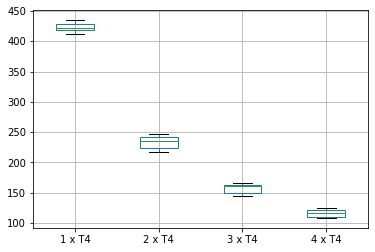

In [24]:
times.boxplot()
plt.savefig('../figs/times_boxplot.png')

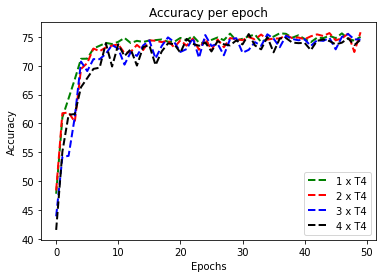

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy per epoch')

plt.plot(epochs, df_1gpu['epoch_acc'], 'g--', label="1 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_2gpus_combined['epoch_acc'], 'r--', label="2 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_3gpus_combined['epoch_acc'], 'b--', label="3 x T4", linewidth=2, markersize=12)
plt.plot(epochs, df_4gpus_combined['epoch_acc'], 'k--', label="4 x T4", linewidth=2, markersize=12)

plt.legend()
plt.savefig('../figs/acc_50epochs.png')

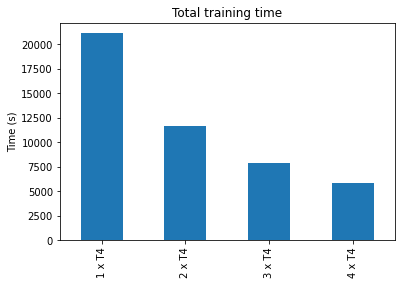

In [20]:
times_total = times.sum(axis=0)

ax = times_total.plot.bar()
ax.set_ylabel("Time (s)")
ax.set_title("Total training time")

plt.savefig('../figs/total_time.png')
plt.show()